# BACKGROUND


- A big make up company called X has just launched their latest blush on products. The company has a marketing plan in order to increase their sales on their new product in the U.S. especially for young people. 
- Therefore, the company wants to conduct their marketing campaigns through the social media, specifically YouTube since YouTube has a huge market for the company to do their marketing campaign

# PROBLEM STATEMENT


- This make up company wants to implement their marketing campaign through YouTube Ads Platform/Endorsement through YouTube video,but they are clueless on how to promote their products. It is either targeted segmentation ads or generalized segmentation ads. Or which channel should the company do their marketing campaign with(endorsement).

- The main problem:
**How to promote the company's latest blush on products through YouTube platform?**

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime, timedelta
from pandas import json_normalize


import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

# DATA

## Dataset:  
Consists of trending videos from 2017-2018 in the United States															

* video_id : Unique ID for every of the video
* trending_date: date when the video is trending
* title: video title
* channel_title: youtube channel name of the trending video
* category_id: types of categories of trending videos
* publish_time: when the first time video was released
* tags: keywords for the video
* views : number of times a video has been viewed
* likes: number of likes from the video
* dislikes: number of dislikes from the video
* comment_count : the number of comments on the video
* thumbnail_link: thumbnail link for the trending video
* comments_disabled: True - comments disabled, False - comments enabled
* ratings_disabled: True - rating disabled, False - rating enabled
* video_error_or_removed: True - video has been removed/error, False - video has not been removed/error
* description: description part of the video

Here are the top 5 lines of the USvideos.csv dataset.

In [199]:
df=pd.read_csv('USvideos.csv')
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# DATA CLEANING, UNDERSTANDING & STATISTICS
Before we start to analyze our data first we're going to manage the inside of the data, modify and add some data based on the current dataset for analysis purpose

## Data Cleaning

### 'tags_count' 
Search for count of tags on each video

In [201]:
df['tags_count']=0
a=0
for x in df['tags']:
    df['tags_count'][a]=len(x.split('|'))
    a+=1

C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\3591125104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags_count'][a]=len(x.split('|'))


### trending_days_count
Count how many days a video is on trending

In [202]:
df['trending_days_count']=0
a=0
for i in df['video_id']:
    df['trending_days_count'][a]=(df[df['video_id']==df['video_id'][a]]['video_id']).count()
    a+=1

C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\1574482761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_days_count'][a]=(df[df['video_id']==df['video_id'][a]]['video_id']).count()


### Category synchronization of  US_category_id.json inside USvideos.csv

* filter data from json file, what data is needed
* We need the snippet.title to synchronize the data with our category_id

In [203]:
df1=pd.read_json('US_category_id.json')
df2=json_normalize(data=df1['items'])
df2['idnew']=df2['id'].astype('int')
df2=df2[['snippet.title','idnew']]
df2

,snippet.title,idnew
0,Film & Animation,1
1,Autos & Vehicles,2
2,Music,10
3,Pets & Animals,15
4,Sports,17
5,Short Movies,18
6,Travel & Events,19
7,Gaming,20
8,Videoblogging,21
9,People & Blogs,22


- There are 32 categories in YouTube

* link the category on json file to the csv file

In [204]:
b=0
for x in df['category_id']:
    xa=df2[df2['idnew']==x]['snippet.title']
    for y in xa:
        df['category_id'][b]=y
    b+=1

C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\3444088787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_id'][b]=y


### Divide publish_time column to publish_time and publish_date

* publish_date: year month day video was released

In [205]:
df['publish_date']=df['publish_time'].str.split('T').str[0]

In [206]:
df["publish_date"]= pd.to_datetime(df["publish_date"])
df['publish_date']

0       2017-11-13
1       2017-11-13
2       2017-11-12
3       2017-11-13
4       2017-11-12
           ...    
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
40947   2018-05-17
40948   2018-05-17
Name: publish_date, Length: 40949, dtype: datetime64[ns]

* publish_time: hours minutes seconds video released

In [207]:
ba=df['publish_time'].str.split('T').str[1]
df['publish_time']=ba.str.split('.').str[0]
df['publish_time']

0        17:13:01
1        07:30:00
2        19:05:24
3        11:00:04
4        18:01:41
           ...   
40944    13:00:04
40945    01:00:06
40946    17:34:22
40947    17:00:04
40948    17:09:38
Name: publish_time, Length: 40949, dtype: object

### trending_date conversion 
Convert trending_date to formate datetime

In [208]:
date_split=df['trending_date'].str.split('.')

In [209]:
df['trending_date']=date_split.str[1]+'-'+date_split.str[2]+'-'+date_split.str[0]
df['trending_date']
df['trending_date']=pd.to_datetime(df['trending_date'])
df['trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, Length: 40949, dtype: datetime64[ns]

### time_difference 
Searching the time difference between the trending_date and the publish_date --> 'time_difference'

In [210]:
df['time_difference']=df['trending_date']-df['publish_date']
df['time_difference']=df['time_difference'].dt.days
df['time_difference']

0         1
1         1
2         2
3         1
4         2
         ..
40944    27
40945    27
40946    27
40947    28
40948    28
Name: time_difference, Length: 40949, dtype: int64

### engagement_rate
(likes+comment_count)/views

In [211]:
df['engagement_rate']=((df['likes']+df['comment_count'])/df['views'])
df['engagement_rate']

0        0.098188
1        0.045431
2        0.048321
3        0.035895
4        0.071456
           ...   
40944    0.024215
40945    0.060053
40946    0.048816
40947    0.036398
40948    0.048697
Name: engagement_rate, Length: 40949, dtype: float64

### Searching for abnormalities

In [212]:
dfaneh=df[df['trending_date']<df['publish_date']].copy().reset_index()
date_split=dfaneh['trending_date'].astype('str').str.split('-')
dfaneh['trending_date']=date_split.str[0]+'-'+date_split.str[2]+'-'+date_split.str[1]
dfaneh['trending_date']=pd.to_datetime(dfaneh['trending_date'])

dfaneh['time_difference']=dfaneh['trending_date']-dfaneh['publish_date']
dfaneh['time_difference']=dfaneh['time_difference'].dt.days

In [213]:
dfaneh

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tags_count,trending_days_count,publish_date,time_difference,engagement_rate
0,3400,6ZfuNTqbHE8,2017-12-01,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157727,...,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,11,9,2017-11-29,2,0.043658
1,3401,nx1R-eHSkfM,2017-12-01,The New Snapchat in 60 Seconds,Snapchat,Music,14:00:03,"new snapchat|""version 2""|""snap inc""|""brandnew""...",1894443,0,...,https://i.ytimg.com/vi/nx1R-eHSkfM/default.jpg,True,True,False,"Evan Spiegel, co-founder and CEO, explains the...",11,8,2017-11-29,2,0.000000
2,3402,XbuQAbG2AZ0,2017-12-01,"Jay-Z and Dean Baquet, in Conversation",The New York Times,News & Politics,14:30:00,"The New York Times|""NY Times""|""NYT""|""Times Vid...",224270,7006,...,https://i.ytimg.com/vi/XbuQAbG2AZ0/default.jpg,False,False,False,"The rapper and music mogul discusses therapy, ...",14,5,2017-11-30,1,0.036264
3,3403,evhLzq7Gsak,2017-12-01,Matt Lauer Has Been Fired From NBC News | TODAY,TODAY,News & Politics,14:42:32,"The TODAY Show|""TODAY Show""|""TODAY""|""NBC""|""NBC...",1717225,10041,...,https://i.ytimg.com/vi/evhLzq7Gsak/default.jpg,False,False,False,Matt Lauer has been dismissed from NBC News. N...,29,2,2017-11-29,2,0.011283
4,3404,KXHrCBkIxQQ,2017-12-01,ALL THE MONEY IN THE WORLD - Official Trailer ...,Sony Pictures Entertainment,Entertainment,20:00:53,"mark wahlberg|""marky mark""|""all the money in t...",616077,5816,...,https://i.ytimg.com/vi/KXHrCBkIxQQ/default.jpg,False,False,False,J. Paul Getty had a fortune. Everyone else pai...,30,8,2017-11-29,2,0.011252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,39144,WIV3xNz8NoM,2018-06-05,Cobra Kai Season 2,Cobra Kai,Entertainment,17:02:55,"cobra kai season 2|""cobra kai new season""|""cob...",1038666,32224,...,https://i.ytimg.com/vi/WIV3xNz8NoM/default.jpg,False,False,False,"The first round’s over, are you ready for the ...",25,28,2018-05-10,26,0.037551
5171,39145,beb8zCGMsbI,2018-06-05,James Veitch’s Elaborate Wrong Number Prank -...,Team Coco,Comedy,01:57:54,Conan O'Brien Conan Conan (TV Series) TBS (TV ...,2237424,64898,...,https://i.ytimg.com/vi/beb8zCGMsbI/default.jpg,False,False,False,CONAN Highlight: When a man confused James for...,1,24,2018-05-10,26,0.029411
5172,39146,QDk-xa1oBXw,2018-06-05,GRAPEFRUIT PEEL STEAK Bistec de Toronja | HARD...,emmymadeinjapan,Howto & Style,00:00:04,"bistek|""toronja""|""grapefruit""|""peel""|""pith""|""f...",212335,8715,...,https://i.ytimg.com/vi/QDk-xa1oBXw/default.jpg,False,False,False,Get your WINSTON tee here: http://bit.ly/winst...,20,21,2018-05-11,25,0.048913
5173,39147,c0bsKc4tiuY,2018-06-05,Why you should make useless things | Simone Gi...,TED,People & Blogs,17:29:47,"TEDTalk|""TEDTalks""|""creativity""|""demo""|""design...",1144940,61441,...,https://i.ytimg.com/vi/c0bsKc4tiuY/default.jpg,False,False,False,"In this joyful, heartfelt talk featuring demos...",9,24,2018-05-09,27,0.056033


In [214]:
df=df[df['trending_date']>=df['publish_date']].reset_index()

* There's abnormality where the trending date is older than the released date. Turns out some of the datas month and date has been switched.
* This can be fixed by switching the month and date back as it should be

* After the abnormality has been solved, now we can concate both of the dataframes

In [215]:
dftotal=pd.concat([df,dfaneh])

In [216]:
# There's no more abnormal data left
dftotal[dftotal['time_difference']<0]

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tags_count,trending_days_count,publish_date,time_difference,engagement_rate


In [217]:
# Terdapat 35691 baris dengan 20 kolom
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 5174
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   40949 non-null  int64         
 1   video_id                40949 non-null  object        
 2   trending_date           40949 non-null  datetime64[ns]
 3   title                   40949 non-null  object        
 4   channel_title           40949 non-null  object        
 5   category_id             40949 non-null  object        
 6   publish_time            40949 non-null  object        
 7   tags                    40949 non-null  object        
 8   views                   40949 non-null  int64         
 9   likes                   40949 non-null  int64         
 10  dislikes                40949 non-null  int64         
 11  comment_count           40949 non-null  int64         
 12  thumbnail_link          40949 non-null  object 

### Searching for Missing values
* There are so few of missing values in this dataset

In [218]:
dftotal.isna().sum()/dftotal.shape[0]*100

index                     0.000000
video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
tags_count                0.000000
trending_days_count       0.000000
publish_date              0.000000
time_difference           0.000000
engagement_rate           0.000000
dtype: float64

* Missing values are only found in the `description` column 1.39%/100%, which is not a problem. Because the `description` column only contains a description of the Youtube video. So I plan to let those missing values and fill it with "-"

<AxesSubplot:>

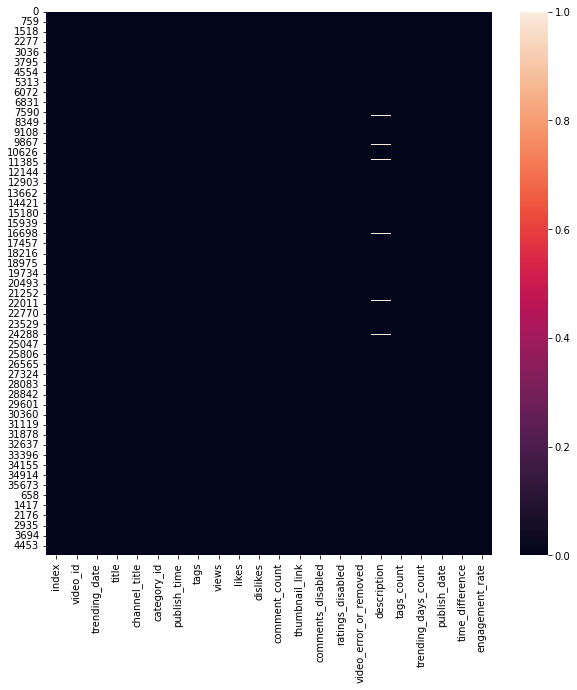

In [219]:
plt.figure(figsize=(10,10))
sns.heatmap(dftotal.isna())

In [220]:
dftotal['description']=dftotal['description'].fillna('-')

### Data Cleaning Results

We have done data cleaning, some things are done as follows:
* modify category_id data based on the snippet.title column from US_category_id.json
* Added the tags_count column
    * tags_count: number of tags on each video
* divide the publish_time column into ---> publish_time and publish_date
    * publish_time: year, month, and day on which the video was published
    * publish_date: hours, minutes, seconds in which the video was published
* add time_difference column
    * time_difference: The difference between the day the trending video was released - the day the video was released
* Added the engagement_rate column
    * engagement_rate: (likes+comments)/views, the higher the ER the better it is
* Modify data that has a time_difference with a negative result *- the date of the trending video cannot be older than the date of the release video -* and then concate the data back to the original dataframe


TOTAL data consists of: 
- Data rows: (total 40949 rows)
- Data columns (total 22 columns)

## Data Understanding & Statistics

In [221]:
listItem = []
for col in dftotal.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel1Desc = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,index,35774,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,video_id,5991,"[2kyS6SvSYSE, 1ZAPwfrtAFY, 5qpjK5DgCt4, puqaWr..."
2,trending_date,187,"[2017-11-14T00:00:00.000000000, 2017-11-15T00:..."
3,title,6083,"[WE WANT TO TALK ABOUT OUR MARRIAGE, The Trump..."
4,channel_title,2130,"[CaseyNeistat, LastWeekTonight, Rudy Mancuso, ..."
5,category_id,16,"[People & Blogs, Entertainment, Comedy, Scienc..."
6,publish_time,4249,"[17:13:01, 07:30:00, 19:05:24, 11:00:04, 18:01..."
7,tags,5702,"[SHANtell martin, last week tonight trump pres..."
8,views,35392,"[748374, 2418783, 3191434, 343168, 2095731, 11..."
9,likes,26762,"[57527, 97185, 146033, 10172, 132235, 9763, 15..."


In [222]:
display(dftotal.describe(), dftotal.describe(include='object'))

,index,views,likes,dislikes,comment_count,tags_count,trending_days_count,time_difference,engagement_rate
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000
mean,20474.000000,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,19.736331,9.790300,45.648001,0.038866
std,11821.102423,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,12.012546,5.763963,159.560485,0.029916
min,0.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000
25%,10237.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,10.000000,6.000000,4.000000,0.017724
50%,20474.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,19.000000,8.000000,7.000000,0.032022
75%,30711.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,29.000000,13.000000,17.000000,0.051951
max,40948.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,69.000000,30.000000,4301.000000,0.325928


,video_id,title,channel_title,category_id,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,6455,2207,16,4478,6055,6352,6902
top,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,Entertainment,14:00:03,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,-
freq,30,30,203,9964,250,1535,30,570


- Based on the statistics, there are 6351 trending videos during 2017-2018 in the United States.
- video_id is a video owned by a trending channel, there are 6455 types of video_id but only 2207 channel titles are trending. It can be interpreted that a channel can have several videos that are trending
- There are only 16 out of 32 categories that are listed as trending
- In average, it took roughly 6 days for a video to go trending for the first time

### We are going to explore based on the dataset

* I assume that the number of tags affects the views and engagement rate. To prove it, we must undergo statistical tests.
It must be checked first whether the distributed data is normal or not, by using normaltest

In [223]:
from scipy.stats import normaltest
stats, pval=normaltest(df['views'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [224]:
from scipy.stats import normaltest
stats, pval=normaltest(df['tags_count'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


- Because it's not normal, we will examine the correlation using spearman

In [225]:
df.corr(method='spearman')

,index,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tags_count,trending_days_count,time_difference,engagement_rate
index,1.000000,0.435189,0.374886,0.357173,0.339486,-0.004843,-0.026574,0.016201,0.080499,0.627025,0.326173,-0.021605
views,0.435189,1.000000,0.861040,0.852534,0.806825,-0.001298,-0.018257,-0.000924,0.081045,0.480727,0.191265,0.023329
likes,0.374886,0.861040,1.000000,0.796891,0.877847,-0.074467,-0.110791,-0.001105,0.060828,0.458117,0.133429,0.461848
dislikes,0.357173,0.852534,0.796891,1.000000,0.837308,-0.020688,-0.110185,-0.002262,0.069676,0.444072,0.134142,0.117231
comment_count,0.339486,0.806825,0.877847,0.837308,1.000000,-0.208336,-0.084565,-0.008562,0.074923,0.418213,0.101017,0.382223
comments_disabled,-0.004843,-0.001298,-0.074467,-0.020688,-0.208336,1.000000,0.299855,-0.002749,-0.053399,-0.020996,0.015914,-0.146256
ratings_disabled,-0.026574,-0.018257,-0.110791,-0.110185,-0.084565,0.299855,1.000000,-0.001441,-0.041563,-0.022948,0.016233,-0.105951
video_error_or_removed,0.016201,-0.000924,-0.001105,-0.002262,-0.008562,-0.002749,-0.001441,1.000000,-0.019994,-0.000521,0.002726,-0.003998
tags_count,0.080499,0.081045,0.060828,0.069676,0.074923,-0.053399,-0.041563,-0.019994,1.000000,0.018219,-0.015052,-0.011910
trending_days_count,0.627025,0.480727,0.458117,0.444072,0.418213,-0.020996,-0.022948,-0.000521,0.018219,1.000000,0.266383,0.068930


<AxesSubplot:>

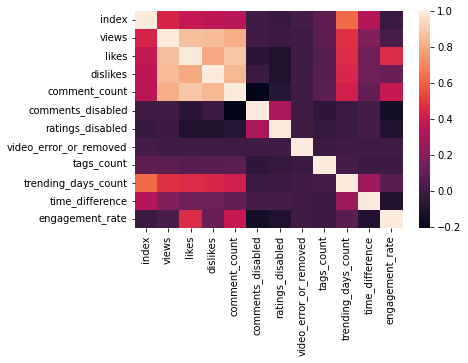

In [226]:
sns.heatmap(data=df.corr('spearman'))

- Based on the correlation, it seems that there is a strong correlation of likes-dislikes-comment_count-views, if each of the data increases in number, then others will also increase (strong influence)
- It turns out that the number of tags has almost no effect on the exposure of trending videos
- there is a correlation between engagement_rate and likes and comment_count although it is not that strong

## We're also going to make a more specific dataframe for specific requirements company needs

In [227]:
df_keyword=df=pd.read_csv('USvideos.csv')

b=0
for x in df_keyword['category_id']:
    xa=df2[df2['idnew']==x]['snippet.title']
    for y in xa:
        df_keyword['category_id'][b]=y
    b+=1

a=0
df_keyword['trending_days_count']=0
for i in df_keyword['video_id']:
    df_keyword['trending_days_count'][a]=(df_keyword[df_keyword['video_id']==df_keyword['video_id'][a]]['video_id']).count()
    a+=1

df_keyword['publish_date']=df_keyword['publish_time'].str.split('T').str[0]
df_keyword["publish_date"]= pd.to_datetime(df_keyword["publish_date"])
df_keyword['publish_date']

ba=df_keyword['publish_time'].str.split('T').str[1]
df_keyword['publish_time']=ba.str.split('.').str[0]
df_keyword['publish_time']
date_split=df_keyword['trending_date'].str.split('.')

df_keyword['trending_date']=date_split.str[1]+'-'+date_split.str[2]+'-'+date_split.str[0]
df_keyword['trending_date']
df_keyword['trending_date']=pd.to_datetime(df_keyword['trending_date'])
df_keyword['trending_date']

df_keyword['time_difference']=df_keyword['trending_date']-df_keyword['publish_date']
df_keyword['time_difference']=df_keyword['time_difference'].dt.days

df_keyword['engagement_rate']=((df_keyword['likes']+df_keyword['comment_count'])/df_keyword['views']).round(3)
df_keyword['engagement_rate']


df_keyword_wrong=df_keyword[df_keyword['trending_date']<df_keyword['publish_date']].copy().reset_index()
date_split=df_keyword_wrong['trending_date'].astype('str').str.split('-')
df_keyword_wrong['trending_date']=date_split.str[0]+'-'+date_split.str[2]+'-'+date_split.str[1]
df_keyword_wrong['trending_date']=pd.to_datetime(df_keyword_wrong['trending_date'])

df_keyword_wrong['time_difference']=df_keyword_wrong['trending_date']-df_keyword_wrong['publish_date']
df_keyword_wrong['time_difference']=df_keyword_wrong['time_difference'].dt.days

a=0
df_keyword_wrong['trending_days_count']=0
for i in df_keyword_wrong['video_id']:
    df_keyword_wrong['trending_days_count'][a]=(df_keyword_wrong[df_keyword_wrong['video_id']==df_keyword_wrong['video_id'][a]]['video_id']).count()
    a+=1

df_keyword_wrong=df_keyword_wrong[(df_keyword_wrong['tags'].str.contains("beautiful")) | 
(df_keyword_wrong['tags'].str.contains("make up")) | 
(df_keyword_wrong['tags'].str.contains("beauty")) | 
(df_keyword_wrong['tags'].str.contains("blush on")) |
(df_keyword_wrong['category_id']=='Howto & Style') |
(df_keyword_wrong['category_id']=='People & Blogs')].reset_index()

C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\4095990246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keyword['category_id'][b]=y
C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\4095990246.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keyword['trending_days_count'][a]=(df_keyword[df_keyword['video_id']==df_keyword['video_id'][a]]['video_id']).count()
C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\4095990246.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [228]:
df_keyword=df_keyword[df_keyword['trending_date']>=df_keyword['publish_date']]

df_keyword=df_keyword[(df_keyword['tags'].str.contains("beautiful")) | 
(df_keyword['tags'].str.contains("make up")) | 
(df_keyword['tags'].str.contains("beauty")) | 
(df_keyword['tags'].str.contains("blush on")) |
(df_keyword['category_id']=='Howto & Style') |
(df_keyword['category_id']=='People & Blogs')].reset_index()


In [229]:
df_keyword_total=pd.concat([df_keyword,df_keyword_wrong])

In [230]:
df_keyword_total

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days_count,publish_date,time_difference,engagement_rate,level_0
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17:13:01,SHANtell martin,748374,57527,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,2017-11-13,1,0.098,NaN
1,23,JBZTZZAcFTw,2017-11-14,"What $4,800 Will Get You In NYC | Sweet Digs H...",Refinery29,Howto & Style,16:00:01,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,1707,...,https://i.ytimg.com/vi/JBZTZZAcFTw/default.jpg,False,False,False,"On this episode of Sweet Digs, we tour Social ...",3,2017-11-12,2,0.016,NaN
2,27,qeWvgZLz9yU,2017-11-14,A Smart... MUG?! - Take apart a Heated Thermos!,JerryRigEverything,Howto & Style,16:00:03,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,9033,...,https://i.ytimg.com/vi/qeWvgZLz9yU/default.jpg,False,False,False,YouTubes new channel!: https://www.youtube.com...,5,2017-11-13,1,0.086,NaN
3,35,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,People & Blogs,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,4,2017-04-21,207,0.030,NaN
4,38,dQvIbulWCM4,2017-11-14,Celebrities on Thanksgiving 2017!,Niki and Gabi,Comedy,23:41:48,"niki and gabi|""nikiandgabibeauty""|""celebrities...",605932,38397,...,https://i.ytimg.com/vi/dQvIbulWCM4/default.jpg,False,False,False,Celebrities on Thanksgiving 2017!\nWhat if one...,4,2017-11-12,2,0.069,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,39115,QBL8IRJ5yHU,2018-06-05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,Howto & Style,19:00:01,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3768814,304874,...,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,5,2018-05-14,22,0.095,5141.0
994,39125,Xpv-sEKl1B4,2018-06-05,"Why You Should Wake Up at 4:30 AM Every Day, A...",Business Insider,Howto & Style,20:00:02,"Business Insider|""Business News""|""scheduling""|...",3885870,79169,...,https://i.ytimg.com/vi/Xpv-sEKl1B4/default.jpg,False,False,False,"With a busy schedule, Jocko Willink finds time...",5,2018-05-13,23,0.023,5151.0
995,39139,0zZ0Y_UZRBw,2018-06-05,THE GREEN MAKEUP CHALLENGE! | NikkieTutorials,NikkieTutorials,Howto & Style,21:11:15,"the green makeup challenge|""green makeup chall...",2845710,157851,...,https://i.ytimg.com/vi/0zZ0Y_UZRBw/default.jpg,False,False,False,"Hello guys, it’s me Hulk Tutorials, hello! HAH...",5,2018-05-10,26,0.060,5165.0
996,39146,QDk-xa1oBXw,2018-06-05,GRAPEFRUIT PEEL STEAK Bistec de Toronja | HARD...,emmymadeinjapan,Howto & Style,00:00:04,"bistek|""toronja""|""grapefruit""|""peel""|""pith""|""f...",212335,8715,...,https://i.ytimg.com/vi/QDk-xa1oBXw/default.jpg,False,False,False,Get your WINSTON tee here: http://bit.ly/winst...,3,2018-05-11,25,0.049,5172.0


# DATA VISUALISATION AND ANALYSIS

## General Data
Just a general outlook on the YouTube trending data

Categories With the Most Trending Videos

In [231]:
bar1=dftotal.groupby(['category_id'])['video_id'].count().nlargest(n=10).to_frame().reset_index()
bar1

,category_id,video_id
0,Entertainment,9964
1,Music,6472
2,Howto & Style,4146
3,Comedy,3457
4,People & Blogs,3210
5,News & Politics,2487
6,Science & Technology,2401
7,Film & Animation,2345
8,Sports,2174
9,Education,1656


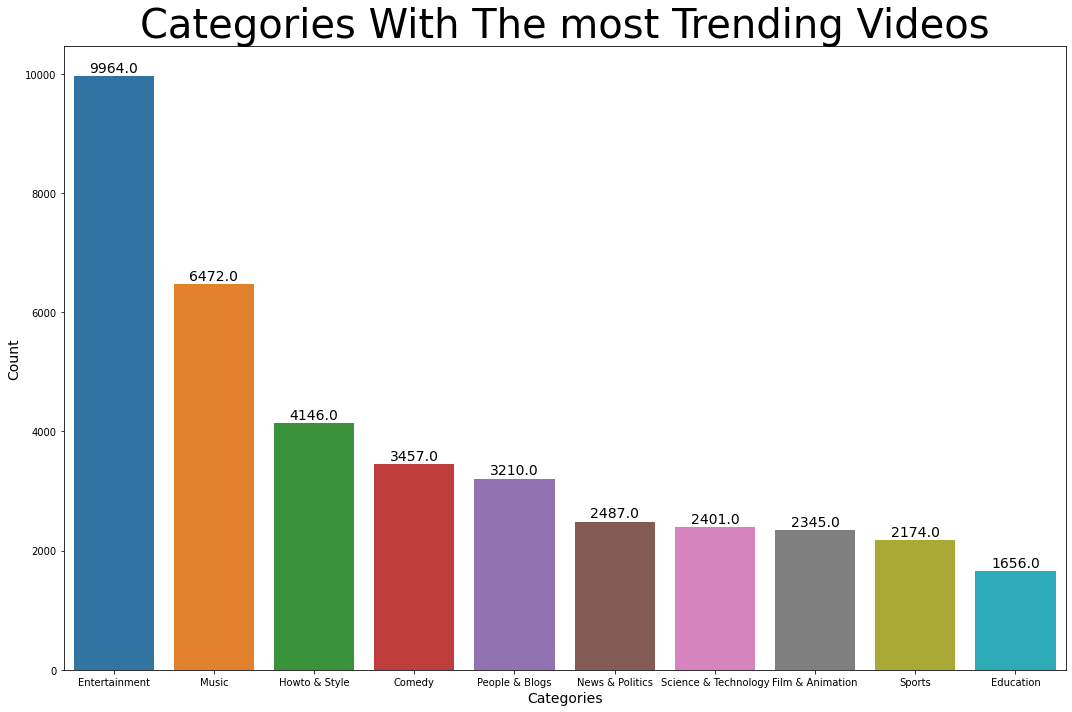

In [232]:
bar1=dftotal.groupby(['category_id'])['video_id'].count().nlargest(n=10).to_frame().reset_index()
plt.figure(figsize=(15,10))


ax = sns.barplot(x="category_id", y="video_id", data=bar1, ci=0)
for bar in ax.patches:
	ax.annotate(format(bar.get_height()),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                       
                ha='center',                              
                va='center',
                size=14, 
                xytext=(0, 8),                           
                textcoords='offset points')
plt.xlabel("Categories", size=14)
plt.ylabel("Count", size=14)
plt.title("Categories With The most Trending Videos",size=40)
plt.tight_layout()
plt.show()

- We can see from the general overview, the top 3 categories that have the most video. Those are Entertainment, Music, Howto & Style

In [233]:
bar1=dftotal.groupby(dftotal['category_id'])['views'].sum().nlargest(n=10).to_frame().reset_index()
bar1

,category_id,views
0,Music,40132892190
1,Entertainment,20604388195
2,Film & Animation,7284156721
3,Comedy,5117426208
4,People & Blogs,4917191726
5,Sports,4404456673
6,Howto & Style,4078545064
7,Science & Technology,3487756816
8,Gaming,2141218625
9,News & Politics,1473765704


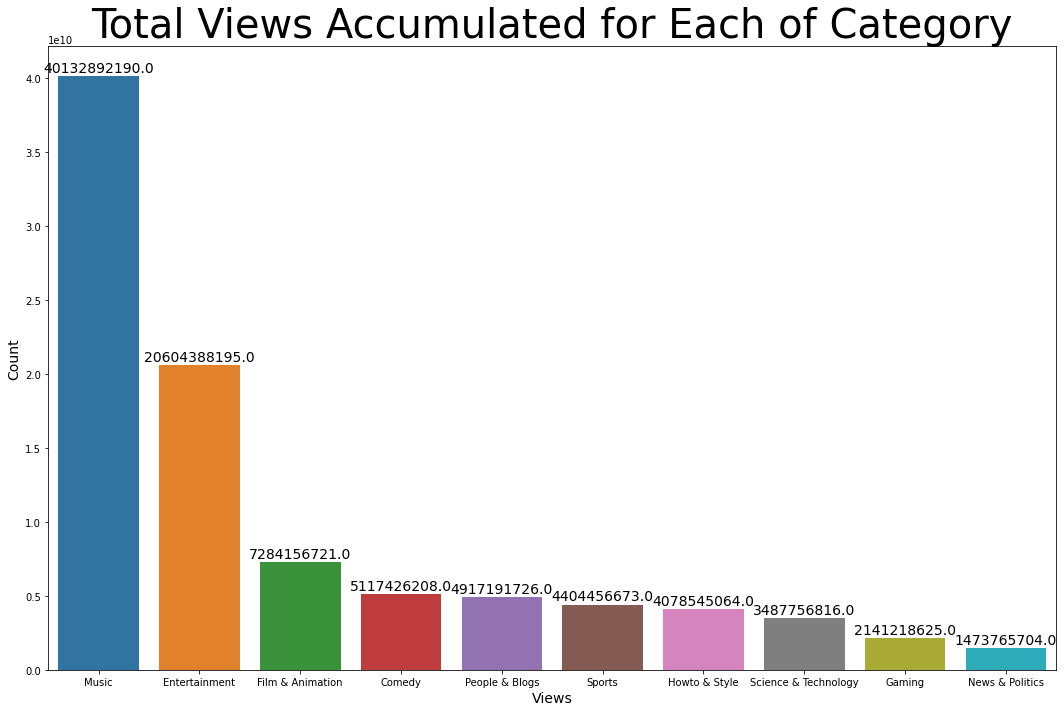

In [234]:
bar1=dftotal.groupby(dftotal['category_id'])['views'].sum().nlargest(n=10).to_frame().reset_index()
plt.figure(figsize=(15, 10))


ax = sns.barplot(x="category_id", y="views", data=bar1, ci=0)
for bar in ax.patches:
	ax.annotate(format(bar.get_height()),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                       
                ha='center',                              
                va='center',
                size=14, 
                xytext=(0, 8),                           
                textcoords='offset points')
plt.xlabel("Views", size=14)
plt.ylabel("Count", size=14)
plt.title("Total Views Accumulated for Each of Category",size=40)
plt.tight_layout()
plt.show()


- Based on views, the top 3 categories that have the most views are Entertainment, Music, Film & Animation

In [235]:
bar1=dftotal.groupby(['channel_title','category_id'])['views'].sum().nlargest(n=10).to_frame().reset_index()
bar1

,channel_title,category_id,views
0,ChildishGambinoVEVO,Music,3758488765
1,ibighit,Music,2235906679
2,Dude Perfect,Sports,1870085178
3,Marvel Entertainment,Entertainment,1806126076
4,ArianaGrandeVevo,Music,1576959172
5,MalumaVEVO,Music,1551515831
6,jypentertainment,Music,1486972132
7,Sony Pictures Entertainment,Entertainment,1432374398
8,FoxStarHindi,Entertainment,1238609854
9,BeckyGVEVO,Music,1182971286


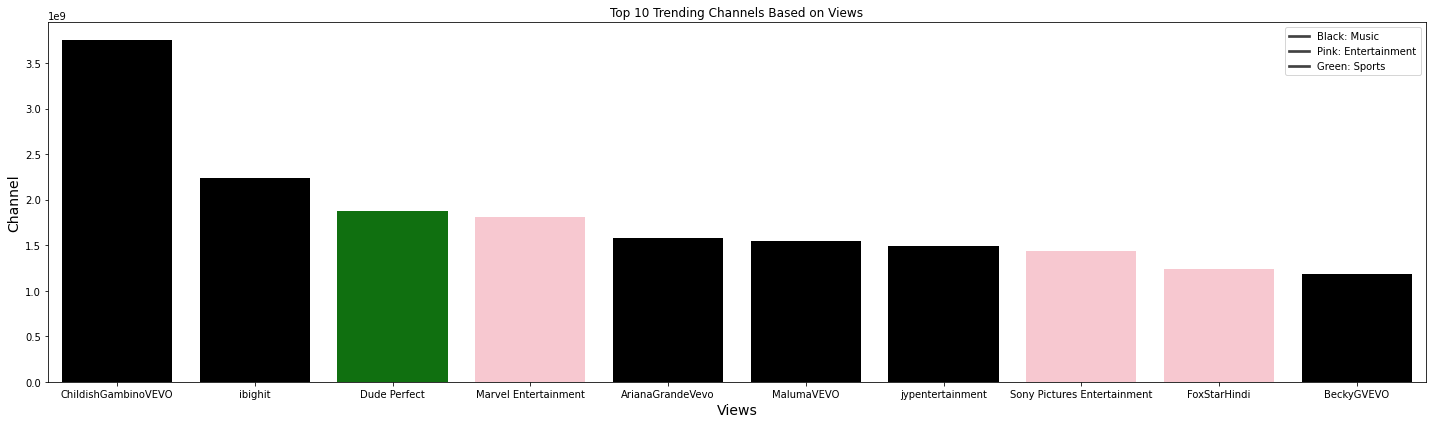

In [236]:
bar1=dftotal.groupby(['channel_title','category_id'])['views'].sum().nlargest(n=10).to_frame().reset_index()

plt.figure(figsize=(20, 6))

list1=list(bar1['channel_title'])
list2=list(bar1['category_id'])
a=[]
for x in list2:
    if x=='Music':
        a.append('black')
    elif x=='Entertainment':
        a.append('pink')
    else:
        a.append('green')
mypalette=dict(zip(list1, a))

ax = sns.barplot(x="channel_title", y="views",palette=mypalette,data=bar1, ci=0)

plt.xlabel("Views", size=14)
plt.ylabel("Channel", size=14)
plt.title("Top 10 Trending Channels Based on Views")
plt.tight_layout()
plt.legend(labels=["Black: Music","Pink: Entertainment","Green: Sports"])
plt.show()

- Based on the views, here are the top 10 channel that has the most views (Mostly dominated by Music and Entertainment categories channel)

In [237]:
bar1=dftotal.groupby(['channel_title','category_id'])['trending_days_count'].mean().nlargest(n=10).to_frame().reset_index()
bar1

,channel_title,category_id,trending_days_count
0,杰威爾音樂 JVR Music,Music,29.0
1,Selena Gomez,Film & Animation,28.0
2,johnmayerVEVO,Music,28.0
3,BackstreetBoysVEVO,Music,27.0
4,Business Insider,Howto & Style,27.0
5,TheOdd2sOut,Comedy,27.0
6,Vat19,Entertainment,27.0
7,Brad Mondo,Entertainment,26.0
8,FifthHarmonyVEVO,Music,26.0
9,ChildishGambinoVEVO,Music,25.0


C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\2046211127.py:11: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  plt.tight_layout()
C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\2046211127.py:11: UserWarning: Glyph 23041 (\N{CJK UNIFIED IDEOGRAPH-5A01}) missing from current font.
  plt.tight_layout()
C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\2046211127.py:11: UserWarning: Glyph 29246 (\N{CJK UNIFIED IDEOGRAPH-723E}) missing from current font.
  plt.tight_layout()
C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\2046211127.py:11: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from current font.
  plt.tight_layout()
C:\Users\mnl\AppData\Local\Temp\ipykernel_5772\2046211127.py:11: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  plt.tight_layout()
c:\Users\mnl\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26480 (\N{CJK UNIFIED I

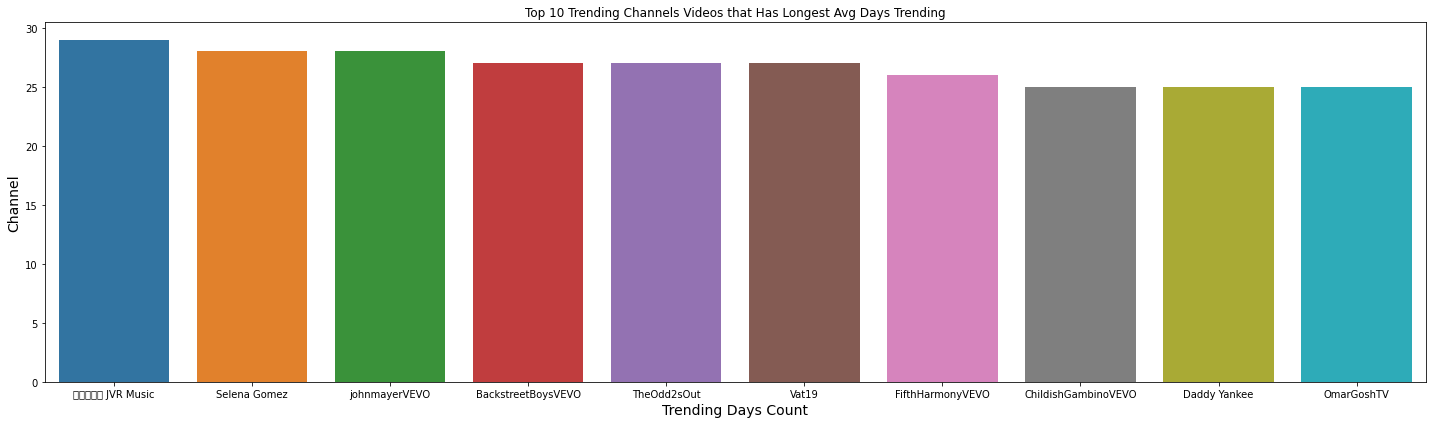

In [238]:
df_analysis=dftotal[(dftotal['time_difference']>3) & (dftotal['time_difference']<18)]
bar1=df_analysis.groupby(['channel_title'])['trending_days_count'].mean().nlargest(n=10).to_frame().reset_index()

plt.figure(figsize=(20, 6))

ax = sns.barplot(x="channel_title", y="trending_days_count",data=bar1, ci=0)

plt.xlabel("Trending Days Count", size=14)
plt.ylabel("Channel", size=14)
plt.title("Top 10 Trending Channels Videos that Has Longest Avg Days Trending")
plt.tight_layout()
plt.show()

* From the Top 10 Trending Channels Videos that Has Longest Avg Days Trending, Music category dominated the chart

## Specific Data (designed for the company)
Because the company is a Makeup company, so we try to specialize datas that are needed for the company to execute their marketing campaign on their new blush on product. It's better to give the advertisement to a more segmented market. 

In YouTube, categories that are possibly related for the company to advertise their new product are:
- Entertainment, People & Blogs, Howto & Style

For the possible keywords that are related to the beauty industry are:
- "beautiful", "make up", "beauty", "blush on"

Thus, in order to make their marketing more targeted to the desired market. We can provide a specific data like this so that their marketing campaign on the new product can be right on target

<AxesSubplot:xlabel='time_difference'>

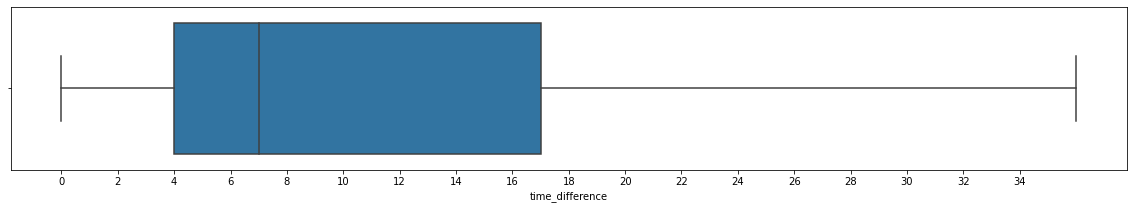

In [239]:
plt.figure(figsize=(20,3))
plt.xticks(ticks=range(0,35,2)) 
sns.boxplot(x=dftotal['time_difference'],showfliers = False)


* It can be seen that the most trending videos have a time span of 4-17 days since the time the video was published. An average of 7 days the video time distance for trending then the number of trending videos decreases if the video time distance for trending is getting longer

* Now, we can focus on channels that has the trending video with a time span of 1-17 days since the video was published 

In [240]:
df_analysis=df_keyword[(df_keyword['time_difference']<18)]

c:\Users\mnl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engagement_rate'>

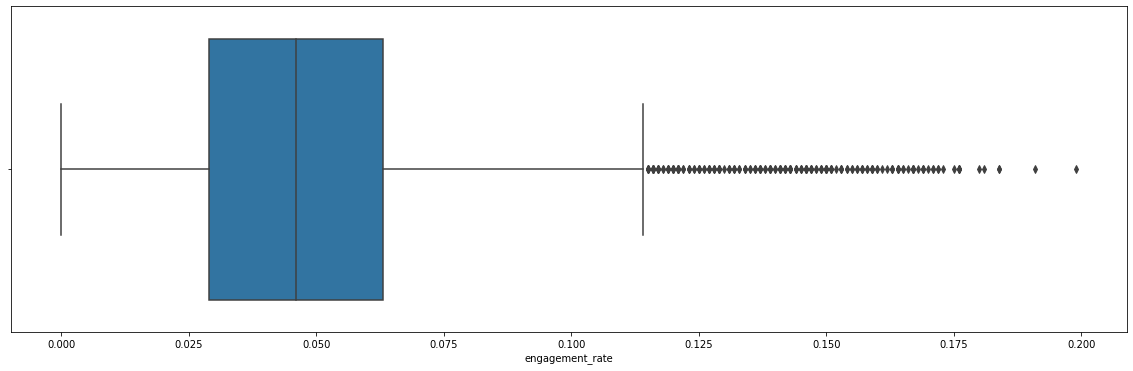

In [241]:
plt.figure(figsize=(20, 6))
sns.boxplot(df_analysis['engagement_rate'])

Usual range of engagement rate lies within 2.9%-6.3% with the median of 4.6%. The higher it is the better

In [242]:
    df_analysis.describe()

,index,views,likes,dislikes,comment_count,trending_days_count,time_difference,engagement_rate
count,4918.000000,4.918000e+03,4.918000e+03,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000
mean,19388.806832,1.097332e+06,4.605177e+04,1943.920903,6213.306832,9.431476,6.083164,0.049564
std,11302.431976,1.955652e+06,8.280373e+04,7708.819014,21177.451171,5.129251,3.821441,0.029785
min,0.000000,8.840000e+02,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8906.250000,2.107368e+05,7.118250e+03,191.000000,691.000000,6.000000,3.000000,0.029000
50%,19816.000000,5.030520e+05,2.014800e+04,529.000000,1704.000000,8.000000,5.000000,0.046000
75%,29223.500000,1.278325e+06,5.134650e+04,1527.000000,5221.250000,13.000000,8.000000,0.063000
max,40888.000000,5.611196e+07,2.032463e+06,228426.000000,383762.000000,29.000000,17.000000,0.199000


- Categories with the most trending videos

In [243]:
bar1=df_analysis.groupby(['category_id',])['video_id'].count().nlargest(n=3).to_frame().reset_index()
bar1

,category_id,video_id
0,Howto & Style,2632
1,People & Blogs,2011
2,Entertainment,178


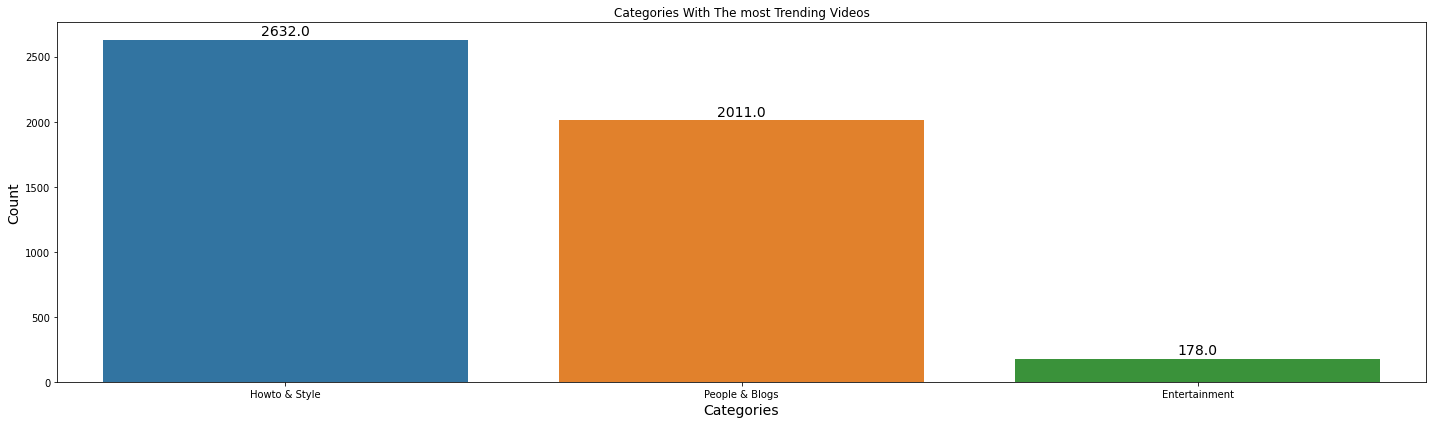

In [244]:
bar1=df_analysis.groupby(['category_id',])['video_id'].count().nlargest(n=3).to_frame().reset_index()

plt.figure(figsize=(20, 6))

ax = sns.barplot(x="category_id", y="video_id", data=bar1, ci=0)
for bar in ax.patches:
	ax.annotate(format(bar.get_height()),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                       
                ha='center',                              
                va='center',
                size=14, 
                xytext=(0, 8),                           
                textcoords='offset points')
plt.xlabel("Categories", size=14)
plt.ylabel("Count", size=14)
plt.title("Categories With The most Trending Videos")
plt.tight_layout()
plt.show()


- We can see that there are 2632 videos in Howto & Style category that are listed on YouTube trending page, followed by People & Blogs (2011), and Entertainment (178)

- Top 10 Trending Channels Based on Views

In [245]:
bar1=df_analysis.groupby(['channel_title','category_id'])['views'].sum().nlargest(n=10).reset_index()
bar1

bar2=[]
for x in bar1['channel_title']:
    bar2.append(round(df_analysis[df_analysis['channel_title']==x]['engagement_rate'].mean(),3))

bar1['engagement_rate']=bar2
bar1

,channel_title,category_id,views,engagement_rate
0,Safiya Nygaard,People & Blogs,383655347,0.057
1,BuzzFeedVideo,People & Blogs,202464343,0.028
2,CaseyNeistat,People & Blogs,167213077,0.050
3,NikkieTutorials,Howto & Style,159910110,0.076
4,James Charles,Entertainment,144866943,0.068
5,BuzzFeedBlue,People & Blogs,125283396,0.022
6,Tasty,Howto & Style,112554850,0.033
7,Kylie Jenner,People & Blogs,111175422,0.000
8,Blossom,Howto & Style,107551658,0.007
9,BuzzFeed Celeb,People & Blogs,102556912,0.073


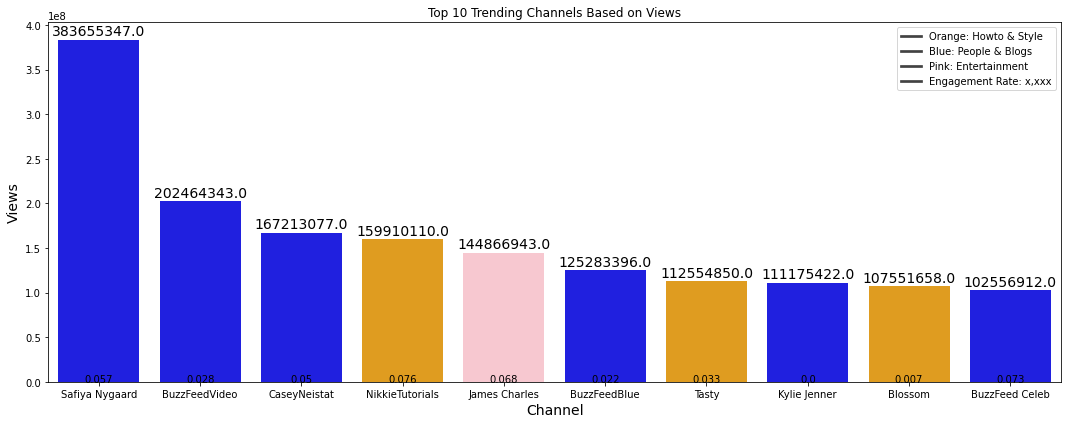

In [246]:
bar1=df_analysis.groupby(['channel_title','category_id'])['views'].sum().nlargest(n=10).reset_index()
bar1

bar2=[]
for x in bar1['channel_title']:
    bar2.append(round(df_analysis[df_analysis['channel_title']==x]['engagement_rate'].mean(),3))

bar1['engagement_rate']=bar2


list1=list(bar1['channel_title'])
list2=list(bar1['category_id'])
a=[]
for x in list2:
    if x=='Howto & Style':
        a.append('orange')
    elif x=='Entertainment':
        a.append('pink')
    else:
        a.append('blue')
mypalette=dict(zip(list1, a))


x=list(bar1['channel_title'])
y=list(bar1['engagement_rate'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2 , y[i], ha = 'center')


plt.figure(figsize=(15, 6))
ax = sns.barplot(x="channel_title", y="views",palette=mypalette, data=bar1, ci=0)
for bar in ax.patches:
	ax.annotate(format(bar.get_height()),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                       
                ha='center',                              
                va='center',
                size=14, 
                xytext=(0, 8),                           
                textcoords='offset points')
plt.xlabel("Channel", size=14)
plt.ylabel("Views", size=14)
addlabels(x,y)
plt.title("Top 10 Trending Channels Based on Views")
plt.tight_layout()
plt.legend(labels=["Orange: Howto & Style","Blue: People & Blogs","Pink: Entertainment","Engagement Rate: x,xxx"])
plt.show()

- Most of the trending channels are coming from People & Blogs category
- Safiya Nygaard dominated the accumulated views on Youtube within these three categories. We can see a potential on her channel to be the candidate of the company's marketing campaign on their latest blush on product

- Top 10 Trending Channels Based on Video Count

In [247]:
bar1=df_analysis.groupby(['channel_title'])['video_id'].count().nlargest(n=10).to_frame().reset_index()
bar1

,channel_title,video_id
0,BuzzFeedVideo,106
1,Safiya Nygaard,103
2,First We Feast,100
3,Tasty,97
4,Bon Appétit,74
5,Great Big Story,71
6,NikkieTutorials,69
7,Vogue,69
8,Rosanna Pansino,64
9,Refinery29,62


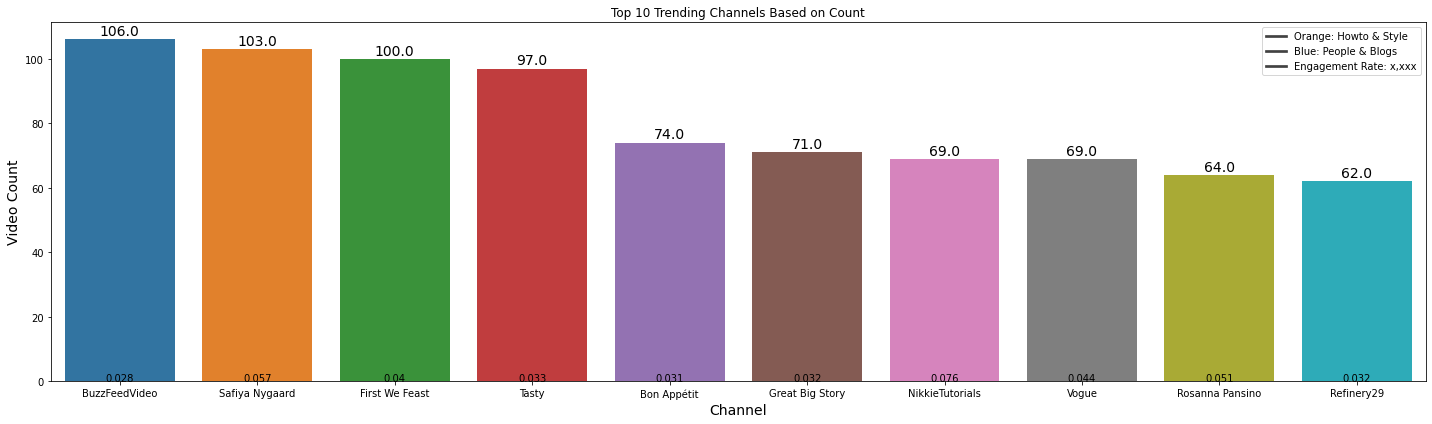

In [248]:
bar1=df_analysis.groupby(['channel_title'])['video_id'].count().nlargest(n=10).to_frame().reset_index()

plt.figure(figsize=(20, 6))

bar2=[]
for x in bar1['channel_title']:
    bar2.append(round(df_analysis[df_analysis['channel_title']==x]['engagement_rate'].mean(),3))
bar1['engagement_rate']=bar2



x=list(bar1['channel_title'])
y=list(bar1['engagement_rate'])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2 , y[i], ha = 'center')


ax = sns.barplot(x="channel_title", y="video_id",data=bar1, ci=0)
for bar in ax.patches:
	ax.annotate(format(bar.get_height()),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                       
                ha='center',                              
                va='center',
                size=14, 
                xytext=(0, 8),                           
                textcoords='offset points')
plt.xlabel("Channel", size=14)
plt.ylabel("Video Count", size=14)
plt.title("Top 10 Trending Channels Based on Count")
plt.tight_layout()
addlabels(x,y)
plt.legend(labels=["Orange: Howto & Style","Blue: People & Blogs","Engagement Rate: x,xxx"])
plt.show()

- Based on the chart, individual YouTube creator Safiya Nygaard is at the top 10 YouTube trending channels based on the video count, which has the most videos listed on the YouTube trending page. We can see a potential on her channel to be the candidate of the company's marketing campaign on their latest blush on product.
- So does Rosanna Pansino, and Nikkie Tutorials

- Top 10 Trending Channels With Highest Engagement Rate

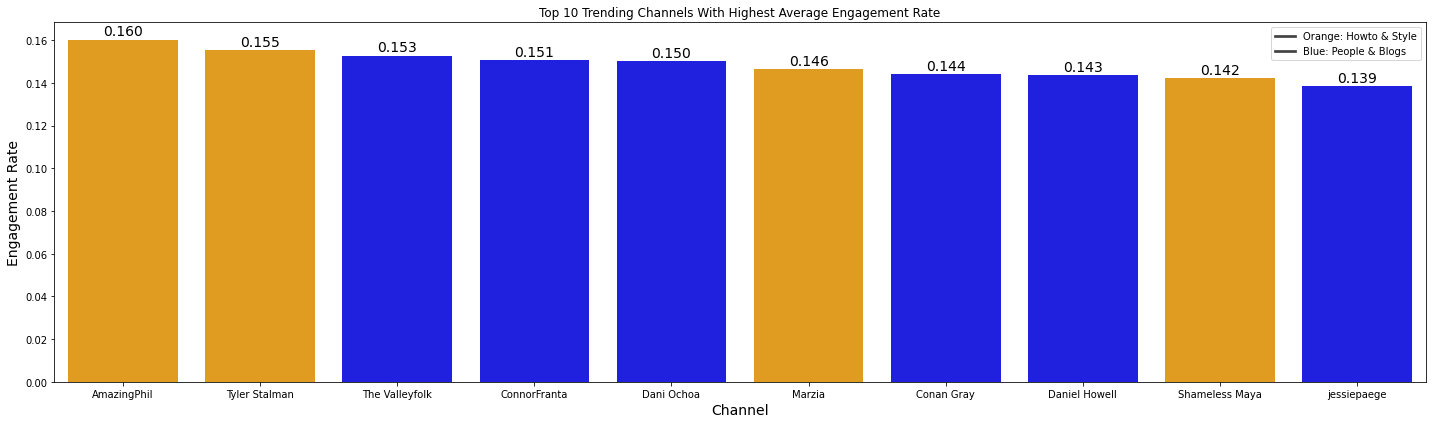

In [249]:
bar1=df_analysis.groupby(['channel_title','category_id'])['engagement_rate'].mean().nlargest(10).to_frame().reset_index()
plt.figure(figsize=(20, 6))

list1=list(bar1['channel_title'])
list2=list(bar1['category_id'])
a=[]
for x in list2:
    if x=='Howto & Style':
        a.append('orange')
    else:
        a.append('blue')
mypalette=dict(zip(list1, a))


ax = sns.barplot(x="channel_title", y="engagement_rate", palette=mypalette ,data=bar1, ci=0)
for bar in ax.patches:
	ax.annotate(format(bar.get_height(),'.3f'),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                       
                ha='center',                              
                va='center',
                size=14, 
                xytext=(0, 8),                           
                textcoords='offset points')
plt.xlabel("Channel", size=14)
plt.ylabel("Engagement Rate", size=14)
plt.title("Top 10 Trending Channels With Highest Average Engagement Rate")
plt.tight_layout()
plt.legend(labels=["Orange: Howto & Style","Blue: People & Blogs"])
plt.show()

- Based on the engagement rate, seems like the YouTube channel AmazingPhil has the highest average engagement rate around 16%

# CONCLUSION
Seeing the general overview data clearly can be seen that there are the top 2 categories that dominated the YouTube 2017-2018's trending section based on these charts:
- Categories With the Most Trending Videos
- Total Views Accumulated for Each Category
- Top 10 Trending Channels Based on Views
- Top 10 Trending Channels Videos that Has Longest Avg Days Trending
    - Categories: Music and Entertainment

Both categories have the highest views accumulated and the most video listed on the YouTube trending page. Film & Animation also may become a potential category to do the marketing campaign.

Seeing the specific overview data, the trending days are set to 1-17 days because the company wants to do the marketing on their latest product. So it is better to set the time to the usual time when the video can be trending. Around 1-17 days after the video was released, the Howto & Style category has the most videos listed on the YouTube trending page, followed by People & Blogs, and Entertainment. 

# RECOMMENDATION
The company can implement two different approaches to executing the marketing campaign: the first is by using General data, and the second is by using more specific data. For the portion, it is suggested to focus heavily on the segmented market using the specific data to get the marketing right on target.

Based on our analysis, the company can do two types of a marketing campaigns on YouTube
1. Using Youtube Ads
    - YouTube Ads through general data
    - YouTube Ads through specific data
2. Using endorsement for some of the YouTube channels that have good statistics

Using General Data:
- It is recommended to target the marketing campaign to categories that have the most views and videos listed, such as Entertainment and Music
    - For this type, the company divides the portion of their YouTube Ads into the specific data YouTube Ads. I suggest the YouTube Ads portion in the General Data should not be too much, even though it's also necessary to raise their brand awareness in the general society. It can be done by specifying Entertainment and Music categories on the Youtube Ads (25-35% portion of YouTube Ads)
    - It's also possible to endorse some music/entertaiment channels with a good statistic. But I suggest to more focus on the specific data.

Using Specific Data:
- Targeting the marketing campaign to categories like Howto & Style, People & Blogs, or even Entertainment is recommended. The audience in these categories is supposed to know enough about the inside of the beauty industry since we already filtered it using "beautiful," "make up", "beauty", and "blush on" tags. 
    - For the YouTube Ads matter, the company can give a significant portion of the YouTube Ads on this specific data. We assumed the targeted marketing audience is people who know enough about the beauty industry, which usually lies on these categories and tags. (65-75% portion of YouTube Ads)
    - It is also recommended to include endorsement in the company's marketing campaign. Using the specific data above, we can see that there are potential YouTube channels that can be asked to endorse the company's new blush on product.
        - Safiya Nygaard can be one of the YouTube channels that is the potential to do the company's endorsement through the YouTube channel. She's a makeup content creator
            - The channel has the 2nd highest video count (103 Videos featured on YouTube trending) and has the most accumulated views (383,655,347) among those three categories, also a reasonable average engagement rate on her videos(5.8%).
        - NikkieTutorials can be one of the YouTube channels that is the potential to do the company's endorsement through the YouTube channel. She's a makeup artist and can be endorsed for makeup products such as blush on.
            - She has the seventh highest video count (69 videos) and a relatively high average engagement rate (7.6%)
        - James Charles can be one of the YouTube channels that have the potential to do the company's endorsement through the YouTube channel. He's an artist but also can be endorsed for makeup products such as blush on
            - He has the fifth most accumulated views (144,866,943)
        - Rosanna Pansino can be one of the YouTube channels that have the potential to do the company's endorsement through the YouTube channel. She's a makeup content creator
            - She is in the top ninth trending channel based on her video count trending on YouTube (64 videos) and a relatively high average engagement rate (5.1%)
    - *If the company wants to do endorsement to individual YouTube channels, better to request in-depth YouTube statistics for each channel*. Females recommended
    - Else, try to pick YouTube channels that are based on a high Engagement Rate displayed above if the company doesn't want to spend too much cost on the marketing budget. (because not every youtube channel that has a high ER on average has a big audience compared to charts that display top video count/views)
    - The company can explore & modify the datasets filter for further research based on the specific data if they want to search for more talents (e.g: make it top 20 on the chart, add more tags, etc.)

In [250]:
# dftotal.to_excel('capebangett.xlsx')
# df_analysis.to_excel('capebangettt.xlsx')